# 前処理

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


In [122]:
import psycopg2

# データベース設定
dbname = "ds_pro_final" 
user = "anaiyoshikazu" 
password = "test" 
host = "localhost"  
port = "5432"  

# データベースに接続
try:
    conn = psycopg2.connect(
        dbname='ds_pro_final', 
        user='anaiyoshikazu', 
        password='yoshi318', 
        host='localhost',
        port='5432'
    )
except psycopg2.Error as e:
    print("データベース接続中にエラーが発生しました:", e)

query = "SELECT * FROM scrape_scrape;"
df_america = pd.read_sql_query(query, conn)


conn.close()


/var/folders/7s/_btxhv2n665301n2c0k894mm0000gn/T/ipykernel_63224/522093880.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_america = pd.read_sql_query(query, conn)


In [123]:
df_america

,id,offender_age_number_0_9,offender_age_number_10_19,offender_age_number_20_29,offender_age_number_30_39,offender_age_number_40_49,offender_age_number_50_59,offender_age_number_60_69,offender_age_number_70_79,offender_age_number_80_89,...,victim_age_number_30_39,victim_age_number_40_49,victim_age_number_50_59,victim_sum_total,personal_weapons,handgun,knife_cutting_instrument,firearm,none,type_of_weapons_sum_total
0,4,2110,134576,232451,194835,101386,60138,21569,4883,1095,...,218823,137865,89636,969504,214085,155418,101444,76460,66817,815580


In [124]:
df_air = pd.read_csv('/Users/anaiyoshikazu/dsPro/datasets/空気銃.csv')

df_air

,年次,検挙件数（件）,検挙人員（人）,押収物件数（件）
0,2017/12/31,16,13,57
1,2018/12/31,14,13,34
2,2019/12/31,13,11,8
3,2020/12/31,17,16,40
4,2021/12/31,15,12,16


In [125]:
df_air = df_air.rename(columns={'検挙件数（件）' : '検挙件数（空気銃）', '検挙人員（人）' : '検挙人員（空気銃）'})

df_air

,年次,検挙件数（空気銃）,検挙人員（空気銃）,押収物件数（件）
0,2017/12/31,16,13,57
1,2018/12/31,14,13,34
2,2019/12/31,13,11,8
3,2020/12/31,17,16,40
4,2021/12/31,15,12,16


In [126]:
df_air = df_air.drop(columns='押収物件数（件）')

df_air

,年次,検挙件数（空気銃）,検挙人員（空気銃）
0,2017/12/31,16,13
1,2018/12/31,14,13
2,2019/12/31,13,11
3,2020/12/31,17,16
4,2021/12/31,15,12


In [127]:
df_animal = pd.read_csv('/Users/anaiyoshikazu/dsPro/datasets/猟銃.csv')

df_animal

,年次,検挙件数（件）,検挙人員（人）,押収物件数（件）
0,2017/12/31,23,18,14
1,2018/12/31,22,28,32
2,2019/12/31,19,20,10
3,2020/12/31,14,15,12
4,2021/12/31,16,16,12


In [128]:
df_animal = df_animal.rename(columns={'検挙件数（件）' : '検挙件数（猟銃）', '検挙人員（人）' : '検挙人員（猟銃）'})

In [129]:
df_animal = df_animal.drop(columns='押収物件数（件）')
df_animal

,年次,検挙件数（猟銃）,検挙人員（猟銃）
0,2017/12/31,23,18
1,2018/12/31,22,28
2,2019/12/31,19,20
3,2020/12/31,14,15
4,2021/12/31,16,16


# アメリカの暴力犯罪データ

In [130]:
df_america.columns

Index(['id', 'offender_age_number_0_9', 'offender_age_number_10_19',
       'offender_age_number_20_29', 'offender_age_number_30_39',
       'offender_age_number_40_49', 'offender_age_number_50_59',
       'offender_age_number_60_69', 'offender_age_number_70_79',
       'offender_age_number_80_89', 'offender_age_90_older', 'unknown',
       'offender_sum_total', 'victim_age_number_10_19',
       'victim_age_number_20_29', 'victim_age_number_30_39',
       'victim_age_number_40_49', 'victim_age_number_50_59',
       'victim_sum_total', 'personal_weapons', 'handgun',
       'knife_cutting_instrument', 'firearm', 'none',
       'type_of_weapons_sum_total'],
      dtype='object')

### 加害者

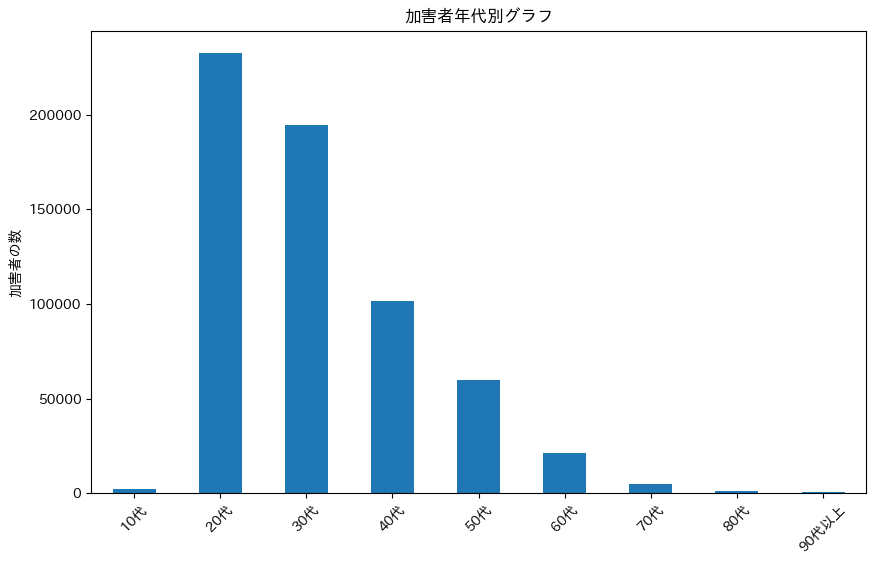

In [131]:
offender_age_groups = df_america[['offender_age_number_0_9', 'offender_age_number_20_29', 'offender_age_number_30_39', 'offender_age_number_40_49', 'offender_age_number_50_59', 'offender_age_number_60_69', 'offender_age_number_70_79', 'offender_age_number_80_89','offender_age_90_older' ]].iloc[0]

# 可視化
plt.figure(figsize=(10, 6))
offender_age_groups.plot(kind='bar')
plt.title('加害者年代別グラフ')
plt.ylabel('加害者の数')
plt.xticks(range(len(offender_age_groups)), ['10代', '20代', '30代', '40代', '50代', '60代', '70代', '80代', '90代以上'], rotation=45)
plt.show()


In [132]:
offender_age_groups

offender_age_number_0_9        2110
offender_age_number_20_29    232451
offender_age_number_30_39    194835
offender_age_number_40_49    101386
offender_age_number_50_59     60138
offender_age_number_60_69     21569
offender_age_number_70_79      4883
offender_age_number_80_89      1095
offender_age_90_older           741
Name: 0, dtype: int64

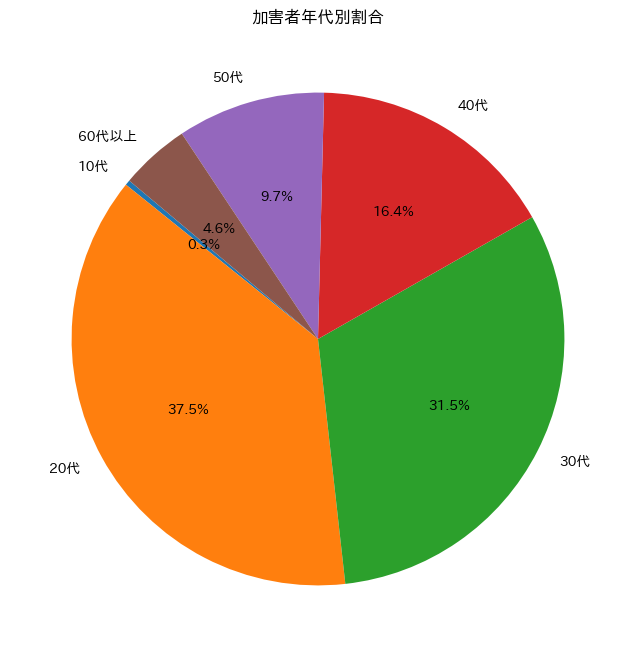

In [134]:
# 60代以上のデータを合計
df_america['offender_age_number_60_older'] = df_america['offender_age_number_60_69'] + df_america['offender_age_number_70_79'] + df_america['offender_age_number_80_89'] + df_america['offender_age_90_older']

# 必要ない列を削除
df_america.drop(['offender_age_number_60_69', 'offender_age_number_70_79', 'offender_age_number_80_89', 'offender_age_90_older'], axis=1, inplace=True)
# 新しいデータフレーム作成
age_groups = df_america[['offender_age_number_0_9', 'offender_age_number_20_29', 'offender_age_number_30_39', 'offender_age_number_40_49', 'offender_age_number_50_59', 'offender_age_number_60_older']].iloc[0]

plt.figure(figsize=(10, 8))
plt.pie(age_groups, labels=['10代', '20代', '30代', '40代', '50代', '60代以上'], autopct='%1.1f%%', startangle=140)
plt.title('加害者年代別割合')
plt.show()